In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **without image argumentation**

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-08-04 09:09:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   128MB/s    in 0.5s    

2021-08-04 09:09:19 (128 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.398.jpg', 'cat.750.jpg', 'cat.646.jpg', 'cat.202.jpg', 'cat.121.jpg', 'cat.161.jpg', 'cat.529.jpg', 'cat.831.jpg', 'cat.471.jpg', 'cat.846.jpg']
['dog.874.jpg', 'dog.828.jpg', 'dog.779.jpg', 'dog.447.jpg', 'dog.456.jpg', 'dog.233.jpg', 'dog.775.jpg', 'dog.642.jpg', 'dog.697.jpg', 'dog.218.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


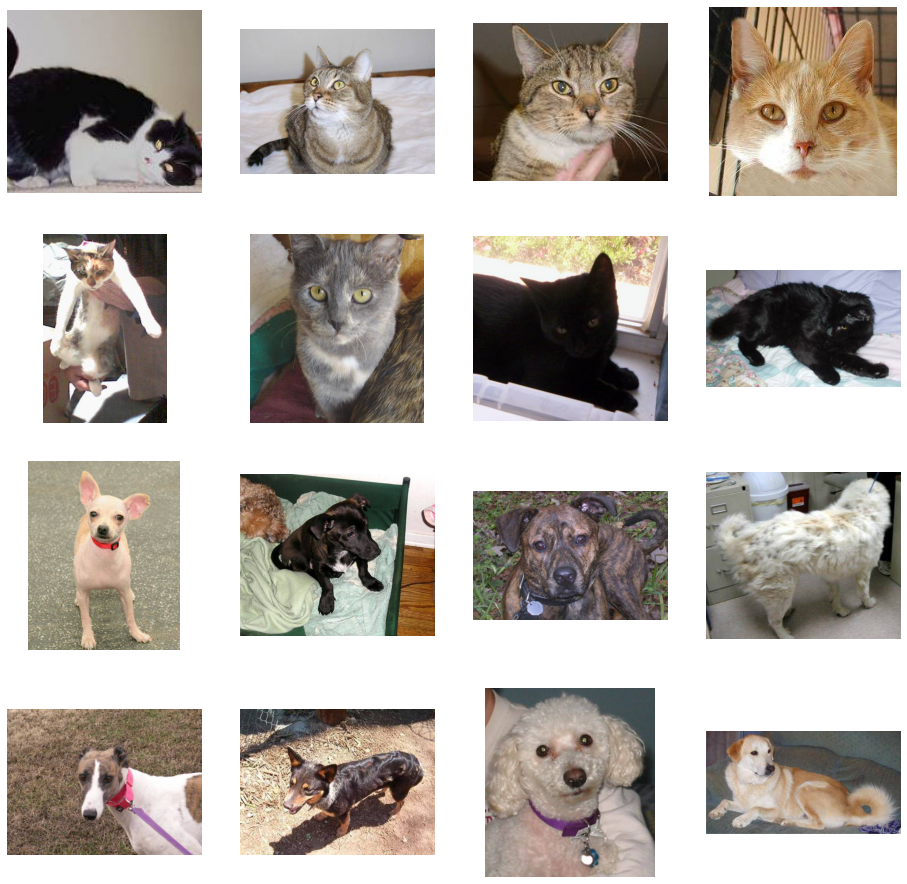

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
)

Epoch 1/100
100/100 [==============================] - 41s 113ms/step - loss: 0.6883 - accuracy: 0.5345 - val_loss: 0.6662 - val_accuracy: 0.6020
Epoch 2/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6492 - accuracy: 0.6190 - val_loss: 0.6165 - val_accuracy: 0.6640
Epoch 3/100
100/100 [==============================] - 11s 113ms/step - loss: 0.5988 - accuracy: 0.6740 - val_loss: 0.5890 - val_accuracy: 0.6860
Epoch 4/100
100/100 [==============================] - 11s 113ms/step - loss: 0.5635 - accuracy: 0.7235 - val_loss: 0.6272 - val_accuracy: 0.6320
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.5408 - accuracy: 0.7345 - val_loss: 0.5695 - val_accuracy: 0.7040
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 0.5184 - accuracy: 0.7350 - val_loss: 0.5535 - val_accuracy: 0.7190
Epoch 7/100
100/100 [==============================] - 11s 113ms/step - loss: 0.4988 - accuracy: 0.7515 - val_loss: 0.5520 -

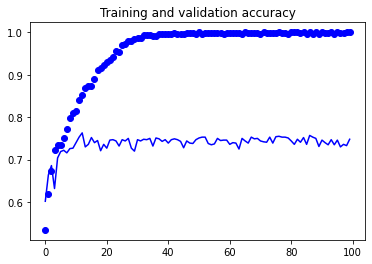

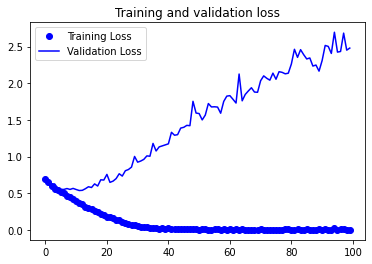

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **with image argumentation**

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [16]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 21s - loss: 0.6946 - accuracy: 0.5185 - val_loss: 0.6863 - val_accuracy: 0.4990
Epoch 2/100
100/100 - 20s - loss: 0.6863 - accuracy: 0.5590 - val_loss: 0.6644 - val_accuracy: 0.6200
Epoch 3/100
100/100 - 20s - loss: 0.6754 - accuracy: 0.5835 - val_loss: 0.6558 - val_accuracy: 0.6040
Epoch 4/100
100/100 - 20s - loss: 0.6612 - accuracy: 0.5935 - val_loss: 0.6679 - val_accuracy: 0.6010
Epoch 5/100
100/100 - 20s - loss: 0.6579 - accuracy: 0.6205 - val_loss: 0.5983 - val_accuracy: 0.6950
Epoch 6/100
100/100 - 20s - loss: 0.6345 - accuracy: 0.6470 - val_loss: 0.5770 - val_accuracy: 0.6990
Epoch 7/100
100/100 - 20s - loss: 0.6154 - accuracy: 0.6590 - val_loss: 0.7573 - val_accuracy: 0.5490
Epoch 8/100
100/100 - 20s - loss: 0.6105 - accuracy: 0.6710 - val_loss: 0.5498 - val_accuracy: 0.7120
Epoch 9/100
100/100 - 20s - loss: 0.6005 - accuracy: 0.6795 - val_loss: 0.5597 - val_accuracy: 0.7080
Epoch 10/100
100/100 - 20s - loss: 0.5785 - accuracy: 0.6995 - val_loss: 0.5364 - 

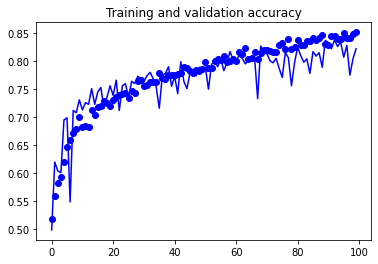

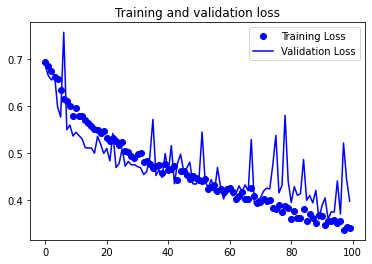

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **improving the model by removing noise and overfitting**

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [21]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 21s - loss: 0.6944 - accuracy: 0.4930 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 20s - loss: 0.6852 - accuracy: 0.5455 - val_loss: 0.6633 - val_accuracy: 0.6180
Epoch 3/100
100/100 - 20s - loss: 0.6744 - accuracy: 0.5860 - val_loss: 0.6468 - val_accuracy: 0.6220
Epoch 4/100
100/100 - 20s - loss: 0.6701 - accuracy: 0.5880 - val_loss: 0.6424 - val_accuracy: 0.6360
Epoch 5/100
100/100 - 20s - loss: 0.6618 - accuracy: 0.5955 - val_loss: 0.6222 - val_accuracy: 0.6550
Epoch 6/100
100/100 - 20s - loss: 0.6506 - accuracy: 0.6060 - val_loss: 0.6128 - val_accuracy: 0.6580
Epoch 7/100
100/100 - 20s - loss: 0.6418 - accuracy: 0.6305 - val_loss: 0.6236 - val_accuracy: 0.6270
Epoch 8/100
100/100 - 20s - loss: 0.6370 - accuracy: 0.6290 - val_loss: 0.6049 - val_accuracy: 0.6640
Epoch 9/100
100/100 - 20s - loss: 0.6243 - accuracy: 0.6440 - val_loss: 0.5837 - val_accuracy: 0.6730
Epoch 10/100
100/100 - 20s - loss: 0.6047 - accuracy: 0.6740 - val_loss: 0.5613 - 

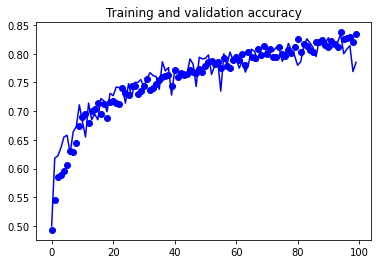

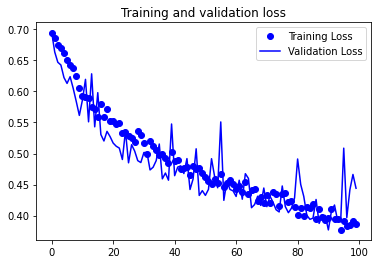

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()